The deadline for this homework is on **27.25.2022 15:49** (right before the practice session). After completing the exercises, you should

1. Download this file into your computer (`File` $\to$ `Download .ipynb`)

2. Download the python files (`.py`) (*if there are any attached to the homework that you need to complete*). 

3. Compress the above files (`.zip` `.rar`) and name the compressed file in the following way *HWx_NameSurname* (for example `HW4_AnunAzganun.zip`)

4. Send the compressed file to this email address `fast.1991.ml@gmail.com` with subject **ML4**

**Note**

* if you do not follow any of the above conditions, your homework will not be graded.

* you do not need to send any dataset files or helper scripts that I provide with your homework (since I already have them).

* you need to write the code for the exercises yourself; you can use ``built-in functions``, ``numpy``, ``pandas``
and ``matplotlib``. Use of other libraries or packages (e.g., scikit-learn) will result in points deducted.

# Mounting Google Drive

1. Create a folder named ``ML`` in your drive

2. Upload the compressed file ``hw4.zip`` into that folder

3. Run the below code snippet and follow the instructions to give access to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


4. We will change our current directory, so that it is easier to import the necessary files from our drive. To do so, just run the below code cell

In [ ]:
cd drive/MyDrive/ML/Homework4

/content/drive/MyDrive/ML/Homework4


5. Now that we are in the desired location, we can unzip the compressed file. 

  **Note that this step needs to be done only once**

In [ ]:
# !unzip hw4.zip

6. Run the below code snippet to import all the necessary libraries, as well as the module(``bagging.py``), which you will fill in soon.

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Plot style
plt.rcParams['figure.figsize'] = (12.0, 8.0)
import progressbar

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from bagging import Bagging, RandomForest

%load_ext autoreload
%autoreload 2

In this homework we will use a variation of the digits data. You can find the [here](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). 

In [ ]:
data = datasets.load_digits(n_class=2) 
X = data.data
y = data.target
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (360, 64)
y shape: (360,)


We will set a test set aside for final evaluation.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=20,
                                                    random_state=0)



As you may have noticed we have a small set of training data, which means that we should not put aside additional data for validation, instead we will use cross-validation.

# Cross-Validation

Until now we have evaluated our models based on their score on a hold-out test set. In this homework, you will need to implement your own cross-validation method inside the function below.

In [ ]:
def do_cross_validation(model, X_train, y_train, k, random_state):
  
  """
  Computes the cross-validation accuracy score
  :param model: model object that has fit and predict methods
  :param X_train: nd array of size (nr_data_points, nr_features)
  :param y_train: nd array of size (nr_data_points, )
  :param k: int for the number of folds (usually k={1,5,10})
  :param random_state: int for fixing the randomness in order to reproduce
                       the same results
  :returns: float of the cross-validation score
  """
  nr_data_points = X_train.shape[0]
  np.random.seed(random_state)
  indices = np.arange(nr_data_points)
  
  # Shuffling, splitting
  np.random.shuffle(indices)
  # erb aranc mnacord indices-y chi bajanvum, mi qni hat hanum enq
  # sax ok a linum
  indices = indices[: len(indices)-len(indices)%k]
  splits = np.array(np.array_split(indices,k))

  # Select train and test, do tree classifier, get average score
  all = []
  for i in range(k):
    cur_ind = splits[splits!=splits[i]]

    curX_train = X_train[cur_ind]
    curY_train = y_train[cur_ind]

    curX_test = X_train[splits[i]]
    curY_test = y_train[splits[i]]

    model.fit(curX_train, curY_train)
    prediction = model.predict(curX_test)
    all.append(accuracy_score(prediction, curY_test))
  
  return (sum(all)/len(all))

# Bagging

Complete the incomplete parts in `bagging.py` script. For the base_estimator we will use the DecisionTreeClassifier from sklearn, but you can also use your own implementation if you want to.

In order to check your implementation, make sure that your Bagging model is able to learn from data (even overfit on it) and result in almost perfect classification on this simple task. You should get above 99% CV accuracy with 20 models.



In [ ]:
model = Bagging(base_estimator=DecisionTreeClassifier, nr_estimators=20)
cv_acc = do_cross_validation(model, X_train, y_train, k=10, random_state=0)
print('CV accuracy is:', cv_acc)

Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


CV accuracy is: 0.9911764705882353


Choose the best value for the number of models in the ensemble based on 10-fold cross-validation (keep the ``random_seed=0``). Plot a figure to show what happens with the CV accuracy when we change the number of models.

In [ ]:
# YOUR CODE HERE
x = np.arange(2,50)
y = []
for i in x:
  model = Bagging(base_estimator=DecisionTreeClassifier, nr_estimators=i)
  y.append(do_cross_validation(model, X_train, y_train, k=10, random_state=0))
  

Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [------------------

**Question** Based on your experiments, what is the best value for the number of models in the ensemble?

**Answer**

Կարելի է վերցնել 7 կամ 10։ Երկուսի դեպքում էլ ստացվում է 0,994% ։

Use the best value of the number of models and train the final model on the whole train dataset and test the model on the train and test sets.

In [ ]:
model1 = Bagging(base_estimator=DecisionTreeClassifier, nr_estimators=10)
model1.fit(X_train, y_train)
preds1 = model1.predict(X_train)
preds2 = model1.predict(X_test)
print('Bagging train accuracy:', accuracy_score(y_train, preds1))
print('Bagging test accuracy:', accuracy_score(y_test, preds2))

Model Training: 100% [-----------------------------------------] Time:  0:00:00


Bagging train accuracy: 1.0
Bagging test accuracy: 1.0


**Question:** What results did you get? How well did the algorithm learn?

**Answer:**

Եվ train-ի, և test-ի ստացել ենք 100% ճշտություն։

# Random Forest

Now we will check the implementation for the Random Forest classifier. Make sure you get above 99% CV accuracy.

In [ ]:
model = RandomForest(10)
cv_acc = do_cross_validation(model, X_train, y_train, k=10, random_state=0)
print('CV accuracy is:', cv_acc)

Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 10)
preds (34, 10)
preds (34, 10)
preds (34, 10)
preds (34, 10)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 10)
preds (34, 10)
preds (34, 10)


Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 10)
preds (34, 10)
CV accuracy is: 0.9911764705882353


Again, choose the best value for the number of models in the ensemble based on 10-fold cross-validation (keep the ``random_seed=0``). Plot a figure to show what happens with the CV accuracy when we change the number of models.

In [ ]:
# YOUR CODE HERE
x = np.arange(1,20)
y = []
for i in range(1,20):
  model = RandomForest(i)
  cv_acc = do_cross_validation(model, X_train, y_train, k=10, random_state=0)
  y.append(cv_acc)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 1)
preds (34, 1)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 1)
preds (34, 1)
preds (34, 1)
preds (34, 1)
preds (34, 1)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 1)
preds (34, 1)
preds (34, 1)
preds (34, 2)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 2)
preds (34, 2)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 2)
preds (34, 2)
preds (34, 2)
preds (34, 2)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 2)
preds (34, 2)
preds (34, 2)
preds (34, 3)
preds (34, 3)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 3)
preds (34, 3)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 3)
preds (34, 3)
preds (34, 3)
preds (34, 3)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 3)
preds (34, 3)
preds (34, 4)
preds (34, 4)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 4)
preds (34, 4)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 4)
preds (34, 4)
preds (34, 4)
preds (34, 4)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 4)
preds (34, 4)
preds (34, 5)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 5)
preds (34, 5)
preds (34, 5)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 5)
preds (34, 5)
preds (34, 5)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 5)
preds (34, 5)
preds (34, 5)
preds (34, 6)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 6)
preds (34, 6)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 6)
preds (34, 6)
preds (34, 6)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 6)
preds (34, 6)
preds (34, 6)
preds (34, 6)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 7)
preds (34, 7)
preds (34, 7)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00

preds (34, 7)
preds (34, 7)



Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 7)
preds (34, 7)
preds (34, 7)
preds (34, 7)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 7)
preds (34, 8)
preds (34, 8)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 8)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 8)
preds (34, 8)
preds (34, 8)
preds (34, 8)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 8)
preds (34, 8)
preds (34, 8)


Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 9)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 9)
preds (34, 9)
preds (34, 9)
preds (34, 9)

Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00



preds (34, 9)
preds (34, 9)


Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 9)
preds (34, 9)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 9)
preds (34, 10)
preds (34, 10)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00

preds (34, 10)
preds (34, 10)
preds (34, 10)



Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 10)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 10)
preds (34, 10)
preds (34, 10)
preds (34, 10)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 11)
preds (34, 11)
preds (34, 11)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 11)
preds (34, 11)
preds (34, 11)
preds (34, 11)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00

preds (34, 11)
preds (34, 11)
preds (34, 11)



Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 12)
preds (34, 12)
preds (34, 12)
preds (34, 12)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 12)
preds (34, 12)
preds (34, 12)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00

preds (34, 12)
preds (34, 12)
preds (34, 12)
preds (34, 13)



Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 13)
preds (34, 13)
preds (34, 13)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 13)
preds (34, 13)
preds (34, 13)
preds (34, 13)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 13)
preds (34, 13)
preds (34, 14)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 14)
preds (34, 14)
preds (34, 14)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 14)
preds (34, 14)
preds (34, 14)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 14)
preds (34, 14)
preds (34, 14)
preds (34, 15)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 15)
preds (34, 15)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 15)
preds (34, 15)
preds (34, 15)
preds (34, 15)
preds (34, 15)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00

preds (34, 15)
preds (34, 15)



Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 16)
preds (34, 16)
preds (34, 16)
preds (34, 16)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 16)
preds (34, 16)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00

preds (34, 16)
preds (34, 16)
preds (34, 16)
preds (34, 16)



Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 17)
preds (34, 17)
preds (34, 17)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 17)
preds (34, 17)
preds (34, 17)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 17)
preds (34, 17)
preds (34, 17)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 17)
preds (34, 18)
preds (34, 18)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 18)
preds (34, 18)
preds (34, 18)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 18)
preds (34, 18)
preds (34, 18)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: N/A% [                                         ] ETA:  --:--:--

preds (34, 18)
preds (34, 18)
preds (34, 19)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 19)
preds (34, 19)
preds (34, 19)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 19)
preds (34, 19)
preds (34, 19)


Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00
Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (34, 19)
preds (34, 19)
preds (34, 19)


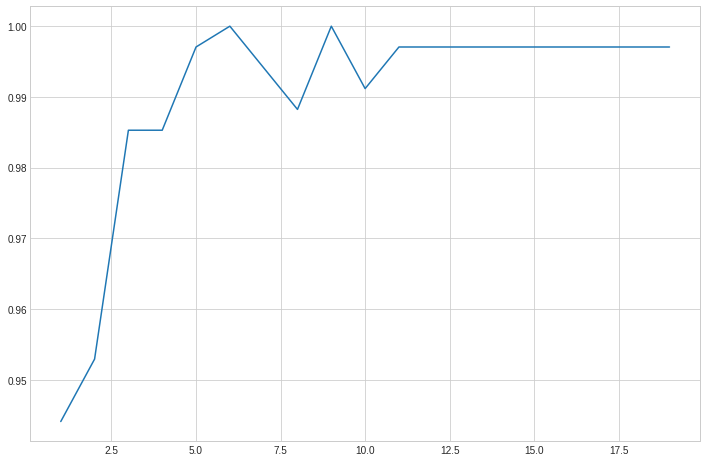

In [ ]:
plt.plot(x,y);

**Question** Based on your experiments, what is the best value for the number of models in the ensemble?

**Answer**

Լավագույն արդյունքները ստանում ենք 6 և 9 -ի դեպքում։

Use the best value of the number of models and train the final model on the whole train dataset and test the model on the train and test sets.

In [ ]:
model2 = RandomForest(6)
model2.fit(X_train, y_train)
preds_rf1 = model2.predict(X_train)
preds_rf2 = model2.predict(X_test)
print('Bagging train accuracy:', accuracy_score(y_train, preds_rf1))
print('Bagging test accuracy:', accuracy_score(y_test, preds_rf2))

Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (340, 6)
preds (20, 6)
Bagging train accuracy: 1.0
Bagging test accuracy: 1.0


**Question:** What results did you get? How well did the algorithm learn?

**Answer:**

# Out-of-bag Score

Now choose the best number of models in the ensemble based on the OOB score, for both of the algorithms.

In [ ]:
# YOUR CODE HERE
model1 = Bagging(base_estimator=DecisionTreeClassifier, nr_estimators=6,oob_score = True)
model1.fit(X_train, y_train)
preds1 = model1.predict(X_train)
preds2 = model1.predict(X_test)
print('Bagging train accuracy:', accuracy_score(y_train, preds1))
print('Bagging test accuracy:', accuracy_score(y_test, preds2))
print(model1.oob_score)

Model Training: 100% [-----------------------------------------] Time:  0:00:00


Bagging train accuracy: 1.0
Bagging test accuracy: 1.0
0.021760502529045544


In [ ]:
# YOUR CODE HERE

model1 = RandomForest(max_features = 10)
model1.fit(X_train, y_train)
preds1 = model1.predict(X_train)
preds2 = model1.predict(X_test)
print('Bagging train accuracy:', accuracy_score(y_train, preds1))
print('Bagging test accuracy:', accuracy_score(y_test, preds2))
print(model1.oob_score)

Model Training: 100% [-----------------------------------------] Time:  0:00:00


preds (340, 100)
preds (20, 100)
Bagging train accuracy: 1.0
Bagging test accuracy: 1.0
False


**Question:** Are the numbers (of the models) the same as with the cross-validation (CV) method? Is the overall trend of the both scores (OOB vs CV) the same when changing the number of models?

**Answer:**

**Question:** In this homework, we have not compared the results of our implementation with that of sklearn's. Can you guess why?

**Answer:**